In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib


In [7]:
# Load dataset
dataset = pd.read_csv("C:/Users/uzma6/Downloads/emotion_sentimen_dataset.csv.zip")

# Display basic dataset info
print(f"Dataset Shape: {dataset.shape}")
print(dataset.head())


Dataset Shape: (839555, 3)
   Unnamed: 0                                               text  Emotion
0           0  i seriously hate one subject to death but now ...     hate
1           1                 im so full of life i feel appalled  neutral
2           2  i sit here to write i start to dig out my feel...  neutral
3           3  ive been really angry with r and i feel like a...    anger
4           4  i feel suspicious if there is no one outside l...  neutral


In [8]:
# Drop any rows with missing values
dataset.dropna(inplace=True)

# Encode the emotions using LabelEncoder
label_encoder = LabelEncoder()
dataset['Emotion'] = label_encoder.fit_transform(dataset['Emotion'])

# Split dataset into features (texts) and labels (emotion)
texts = dataset['text'].values
labels = dataset['Emotion'].values


In [9]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences to ensure uniform input shape
max_len = 100
X = pad_sequences(sequences, maxlen=max_len)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


In [13]:
# Build the model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)


Epoch 1/5
5248/5248 ━━━━━━━━━━━━━━━━━━━━ 3370s 641ms/step - accuracy: 0.8966 - loss: 0.4144 - val_accuracy: 0.9952 - val_loss: 0.0220
Epoch 2/5
5248/5248 ━━━━━━━━━━━━━━━━━━━━ 3681s 701ms/step - accuracy: 0.9957 - loss: 0.0182 - val_accuracy: 0.9984 - val_loss: 0.0072
Epoch 3/5
5248/5248 ━━━━━━━━━━━━━━━━━━━━ 3406s 649ms/step - accuracy: 0.9984 - loss: 0.0062 - val_accuracy: 0.9992 - val_loss: 0.0046
Epoch 4/5
5248/5248 ━━━━━━━━━━━━━━━━━━━━ 3623s 690ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 5/5
5248/5248 ━━━━━━━━━━━━━━━━━━━━ 3668s 699ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9995 - val_loss: 0.0027


In [26]:
# Save the trained model in the new Keras format
model.save('emotion_model.keras')

# Save the tokenizer and label encoder (no change needed here)
import joblib
joblib.dump(tokenizer, 'tokenizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model, Tokenizer, and Label Encoder are saved!")


Model, Tokenizer, and Label Encoder are saved!


In [27]:
# Print training and validation accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Now, make predictions and calculate test accuracy
from sklearn.metrics import accuracy_score

# Step 1: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 2: Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 3: Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_classes)

# Step 4: Print the test accuracy
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Accuracy: 99.96%
Validation Accuracy: 99.95%
5248/5248 ━━━━━━━━━━━━━━━━━━━━ 363s 69ms/step
Test Accuracy: 99.95%


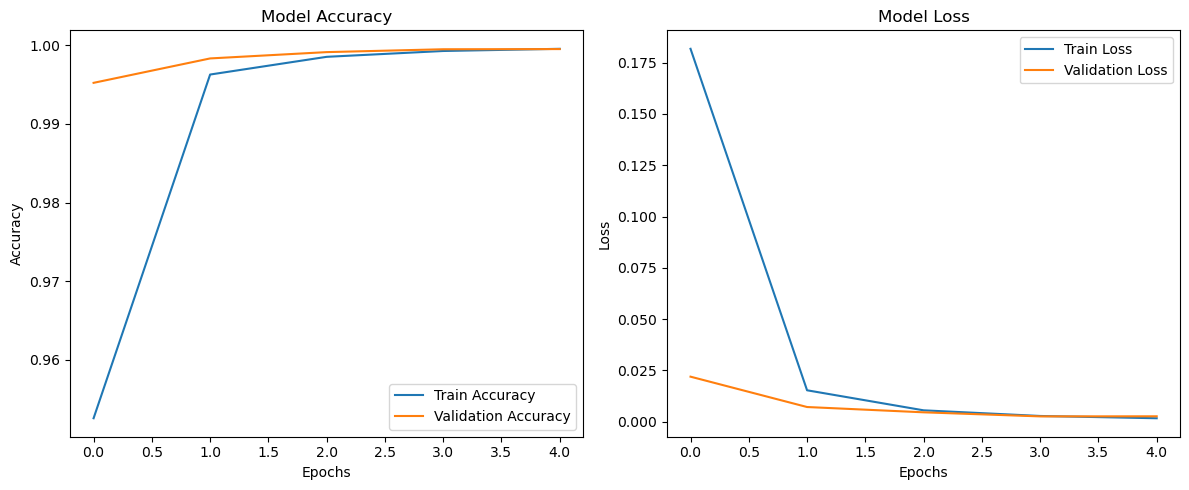

In [28]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [23]:
# Evaluating the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


5248/5248 ━━━━━━━━━━━━━━━━━━━━ 431s 82ms/step
Classification Report:
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00      2489
     boredom       0.78      1.00      0.88        21
       empty       1.00      0.99      1.00      1096
  enthusiasm       1.00      1.00      1.00      1839
         fun       0.99      0.99      0.99      1977
   happiness       1.00      1.00      1.00      5370
        hate       1.00      1.00      1.00      3018
        love       1.00      1.00      1.00      8001
     neutral       1.00      1.00      1.00    134999
      relief       1.00      1.00      1.00      3396
     sadness       1.00      1.00      1.00      3428
    surprise       1.00      1.00      1.00      1372
       worry       1.00      1.00      1.00       905

    accuracy                           1.00    167911
   macro avg       0.98      1.00      0.99    167911
weighted avg       1.00      1.00      1.00    167911



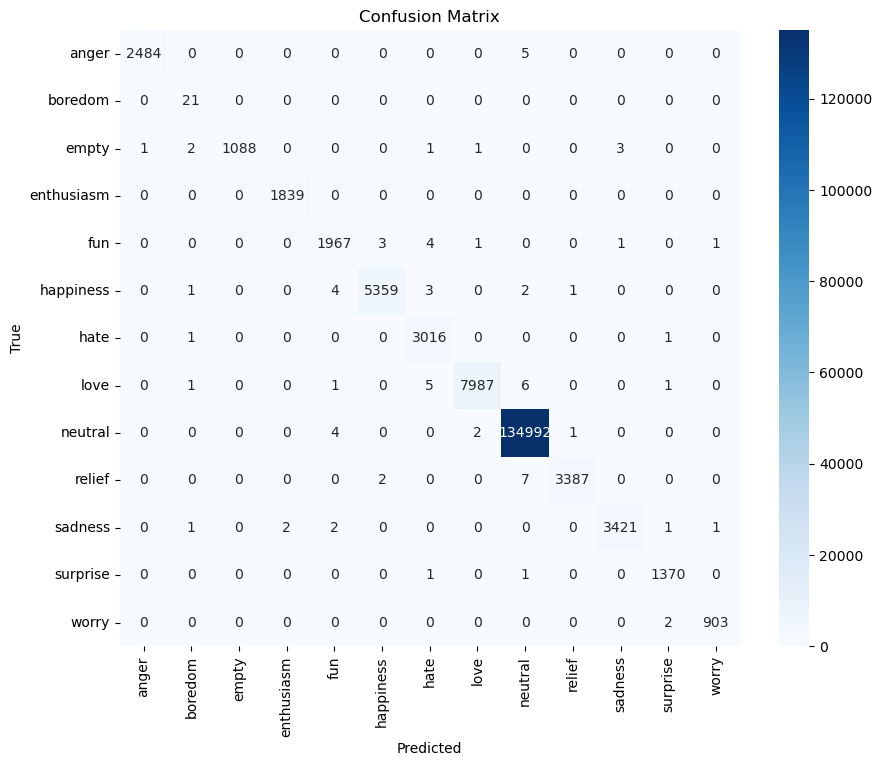

In [29]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [30]:
# Prediction function
def predict_emotion(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    pred = model.predict(padded_sequence)
    emotion = label_encoder.inverse_transform([np.argmax(pred)])
    return emotion[0]

# Test the model with an example
example_text = "I feel so joyful and full of life!"
print(f"The emotion for the input text is: {predict_emotion(example_text)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
The emotion for the input text is: fun
